# Treinamento CIS - 3º Período (Clusterização)

1. Visualize o scatteplot em matriz com hue = “Gender”. Dá para notar alguma
diferença? Se sim, qual e por quê?

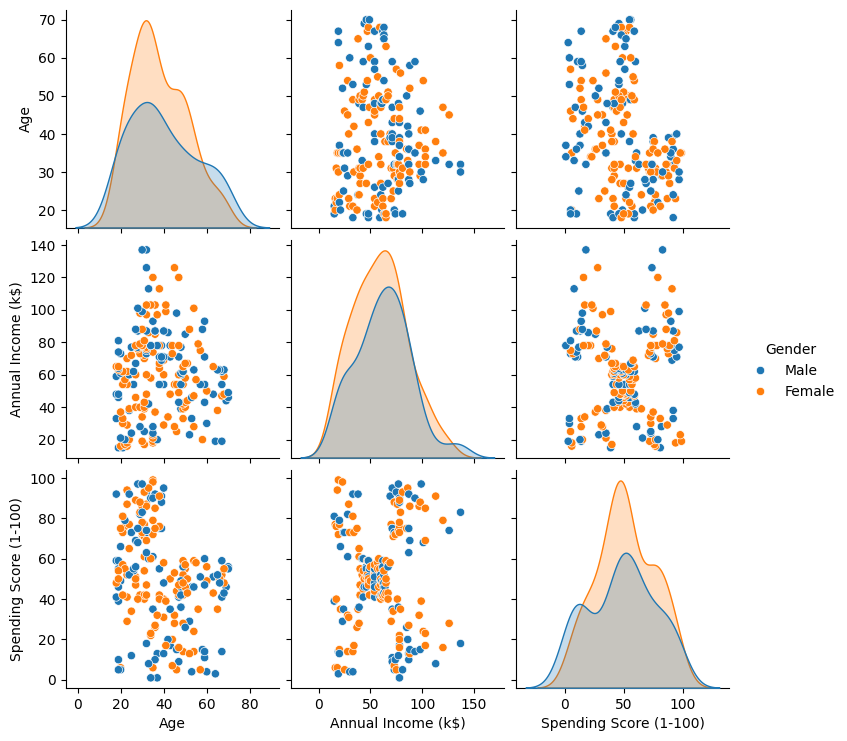

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

customers_path = './data/Mall_Customers.csv'
customers = pd.read_csv(customers_path)

customers = customers.drop(columns=['CustomerID'])
sns.pairplot(customers, hue='Gender')
plt.show()



2. Crie um DataFrame apenas com colunas Annual Income e Spending Score.

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


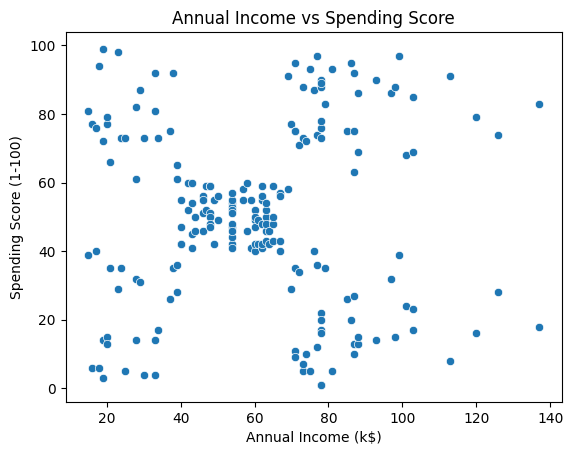

In [61]:
selected_columns = customers[['Annual Income (k$)', 'Spending Score (1-100)']]
print(selected_columns.head())

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=selected_columns)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

3. Importe o K-means

In [62]:
from sklearn.cluster import KMeans

4. Crie o modelo em cluster padrão, sem especificar a quantidade K de clusters


In [63]:
selected_columns = customers[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(random_state=0)

kmeans.fit(selected_columns)


KMeans(random_state=0)

In [64]:
kmeans.labels_

array([3, 4, 7, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 3, 4, 3, 4, 3, 4,
       7, 4, 7, 4, 3, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 4, 3, 4, 3, 4, 3, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 6, 6, 6, 6,
       6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 5, 5,
       5, 5], dtype=int32)

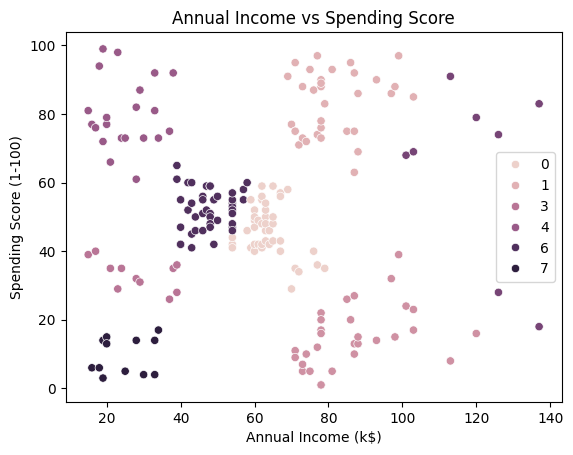

In [65]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=kmeans.labels_ ,data=selected_columns)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

5. Crie uma curva de cotovelo. Qual seria o número ideal de clusters?

In [66]:
k_values = []
inertias = []

for i in range(1,15):
    kmeans_i = KMeans(n_clusters=i,random_state=0).fit(selected_columns)
    k_values.append(i)
    inertias.append(kmeans_i.inertia_)

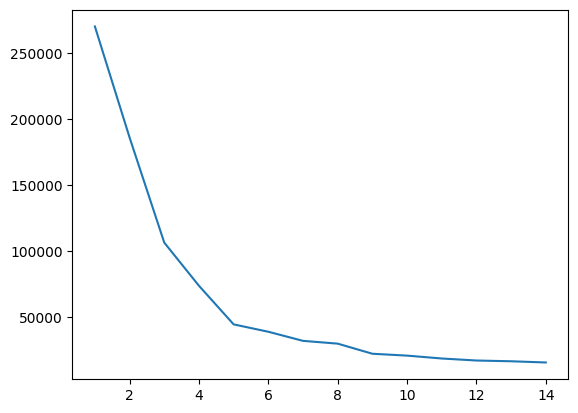

In [67]:
# Relação entre inércia e K
fig,ax = plt.subplots()

ax.plot(k_values,inertias)

plt.show()

Nessa curva de cotovelo podemos inferir que o numero ideal de clusters seria entre 3 e 5. 5 clusters seria ótimo pois a partir desse ponto a curva começa a ficar mais suave e a diminuir a inclinação.

6. Crie novamente o cluster com kmeans com a quantidade de n_clusters ajustada.
Compare os resultados e comente.

/tmp/ipykernel_396821/1142322588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_dataframe['Cluster_3'] = clusters_3


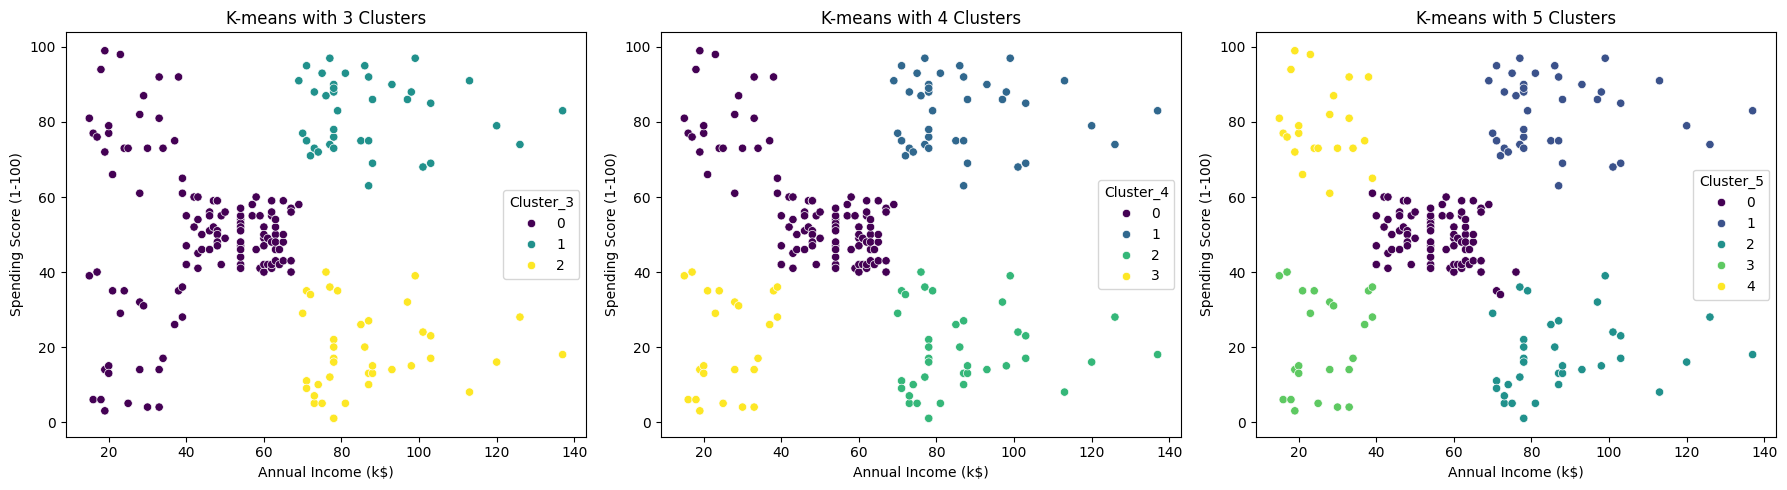

In [68]:
kmeans_3 = KMeans(n_clusters=3,random_state=0).fit(selected_columns)
kmeans_4 = KMeans(n_clusters=4,random_state=0).fit(selected_columns)
kmeans_5 = KMeans(n_clusters=5,random_state=0).fit(selected_columns)

clusters_3 = kmeans_3.predict(selected_columns)
clusters_4 = kmeans_4.predict(selected_columns)
clusters_5 = kmeans_5.predict(selected_columns)

clustered_dataframe = selected_columns

clustered_dataframe['Cluster_3'] = clusters_3
clustered_dataframe['Cluster_4'] = clusters_4
clustered_dataframe['Cluster_5'] = clusters_5

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_3', data=clustered_dataframe, palette='viridis')
axes[0].set_title('K-means with 3 Clusters')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')

sns.scatterplot(ax=axes[1], x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_4', data=clustered_dataframe, palette='viridis')
axes[1].set_title('K-means with 4 Clusters')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')

sns.scatterplot(ax=axes[2], x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_5', data=clustered_dataframe, palette='viridis')
axes[2].set_title('K-means with 5 Clusters')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

Nesse caso é possivel analisar como o uso de k=5 clusters pode ser mais eficiente para a clusterização dos dados.

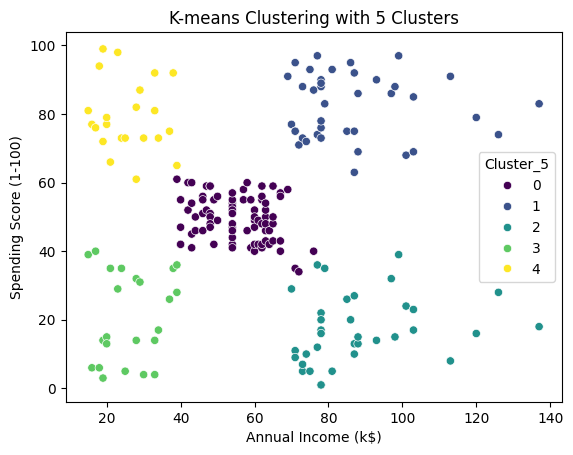

In [69]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_5', data=selected_columns, palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering with 5 Clusters')
plt.show()

7. Quais foram os centroids? Imprima os centroids

In [70]:
print("Centroids for 5 clusters:\n", kmeans_5.cluster_centers_)

Centroids for 5 clusters:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


8. Mostra o gráfico do resultado com os centroids

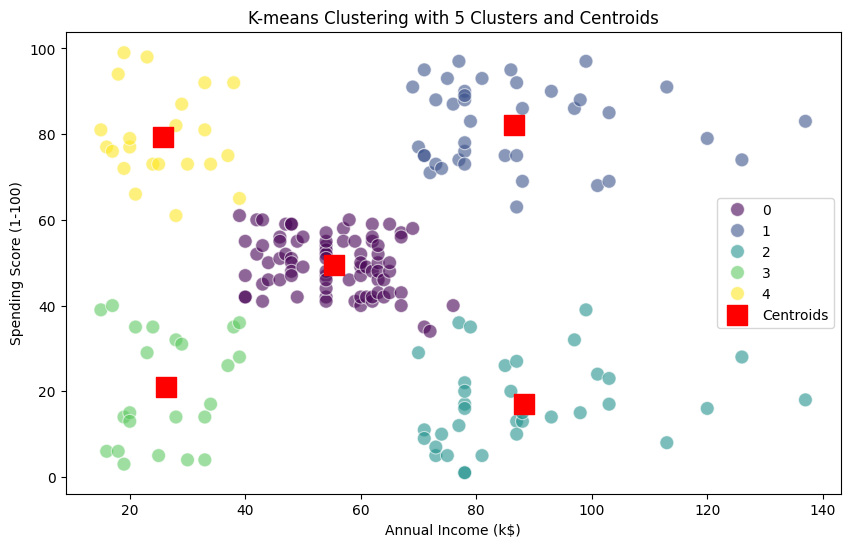

In [71]:
centroids_5 = kmeans_5.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_5', data=selected_columns, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.scatter(centroids_5[:, 0], centroids_5[:, 1], marker='s', s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering with 5 Clusters and Centroids')
plt.legend()
plt.show()

9. Analise o resultado. Pra qual grupo você direcionaria com maior prioridade a
campanha de marketing?

Com base no gráfico gerado, podemos inferir que o cluster 1 seria o mais indicado para direcionar a campanha de marketing, pois é o grupo que possui maior renda anual e maior score de gastos.